# PART 1 - Pivoting for Fun and Profit

In this exercise, we're going to continue working with data about condemned buildings in St. Louis.  This data set is in `/data/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [64]:
%matplotlib inline
import pandas as pd

#loading csv file 
dataset = pd.read_csv('/data/condemn.txt', low_memory=False)
condemnations=dataset.fillna(" ")
#select dates 1986 - 2014
dates=condemnations['InspectDate'].between('1986-01-00 00:00:00','2014-12-32 25:13:70', inclusive=True)
condemnations=condemnations[dates]

#condemnations = ...

In [65]:
condemnations.shape

(30232, 40)

In [66]:
len(condemnations[condemnations['InspectDate'] >= '2015'])

0

In [67]:
assert(condemnations.shape == (30232, 40)) #double check on column**** must create additional column 
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np


#loading csv file 
condemns = pd.read_csv('/data/condemn.txt', low_memory=False)
condemnations1=condemns #remove null with "" because it will give you an extra column for empties 
#select dates 1986 - 2014
dates=condemnations1['InspectDate'].between('1986-01-00 00:00:00','2014-12-32 25:13:70', inclusive=True)
per_year=condemnations1[dates]

per_year['InspectYear'] = per_year['InspectDate'].str[0:4]

by_year = per_year.pivot_table(
    values='AcctNum', 
    index='InspectYear', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0)


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [3]:
by_year.sort_values('InspectYear')

Status,B,L,R,W
InspectYear,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


Status,B,L,R,W
InspectYear,,,,
1986,22,12,19,112
1987,91,20,8,361
1988,215,16,15,297
1989,277,15,11,432
1990,119,29,8,322
1991,139,18,4,351
1992,204,30,4,258
1993,185,47,2,193
1994,208,94,5,293


In [4]:
by_year['B'].sum()

10572

In [77]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


Text(0.5, 1.0, 'Line plot of status')

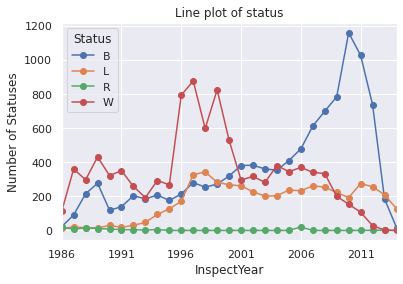

In [71]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
per_year.pivot_table(
    values='AcctNum', 
    index='InspectYear', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0).plot(marker='o')

plt.ylabel('Number of Statuses');
plt.title('Line plot of status')



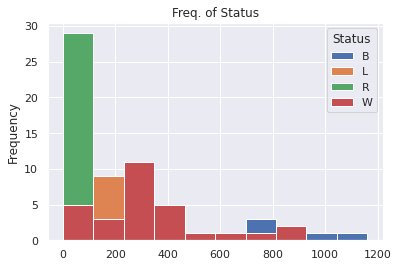

In [72]:
by_year.plot.hist(title='Freq. of Status')

For the multi-series plot, the status R has a very low but constant relationship from the year 1986 to 2014. This also has almost no statuses. For all other statuses, there is a slight increase from 1986-1996. There is a dramatic increase from 1996 to 2000. For B status there is constant but non-linear relationship till 2010 where it decreases till 2014. In the histogram you can see how common B,L,R,W are. Based on this graph, you can see that W status is more common then others. In both charts, the L status shows a low freqeuncy and it is has the least number of statuses next to the R status. 

---

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage has change for my company over the past couple of months.  This real data.  Please don't judge anyone based on the information here.  ;)

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [73]:
import pandas as pd

from pandas import DataFrame, read_csv
meetings = pd.read_csv("meetings.csv",delimiter=',')

meetings['Start'] = meetings['startTime'].str[0:10]
mask=meetings['Start'].between('2020-02-17','2020-02-29', inclusive=1) #this is for filter one dates between 02-17 to 02-29
filter1=meetings[mask]
mask2=meetings['Start'].between('2020-03-17','2020-03-29', inclusive=1)#this is for the filter 2 dates between 03-17 to 03-28
filter2=meetings[mask2]
filter3=meetings[mask | mask2] #combines both filters 
meetings_1=filter3 #this is with the new filter 

start_date='2020-02-29'
end_date='2020-03-16'

meetings_1['Before']=meetings_1['Start']<=start_date
meetings_1['During']=meetings_1['Start']>=end_date
meet2=meetings_1[['userName','Start','Before','During']]

summary=pd.pivot_table(meet2, index='userName')
summary['Difference'] = (summary['During'] - summary['Before'])
summary['pctChange']=(1-summary['Difference'])


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


---

In [74]:
assert(len(summary) == 22)

In [75]:
summary['pctChange'].mean().round(2) #this is my result since I did account for all 22 values 

0.94

In [76]:
assert(summary['pctChange'].mean().round(2))==0.94

In [60]:
assert(summary['pctChange'].mean().round(2) == 0.92)

AssertionError: 